In [2]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
import src.grimoire as Grimoire
import src.decks as Decks
from src.grimoire import By
# import src.decks as Decks


In [3]:
commander = "The Ur-Dragon"
# grim = Grimoire.Grimoire(omnicomprehensive=True)
# Decks.fetch(By.COMMANDER, commander,do_load=False,upper_limit=1000)
grim = Grimoire.fetch(By.COMMANDER,commander, do_load=False)

trovati 900 mazzi da fetchare per The Ur-Dragon
Salvate 8946 carte in commanders/The Ur-Dragon.pkl da Archidekt - 7490.93 kB


In [4]:
from src.card import Filters
# Crea la matrice di correlazione
g = grim.filter( 
    positive_filters=[
        Filters.isLegalInCommander,
        # Filters.isCreature,
        # Filters.isGreen
        # Filters.isColorless
    ], 
    negative_filters=[
        Filters.isToken
        # Filters.isCreature
        # Filters.isLegendary
    ])
print(f'{len(grim)-len(g)} carte filtrate')

0 carte filtrate


cityblock [615, 615, 615, 615, 615, 615, 615, 615]
cityblock [615, 615, 615, 615, 615, 615, 615, 615]
cityblock [615, 615, 615, 615, 615, 615, 615, 615]
cityblock [615, 615, 615, 615, 615, 615, 615, 615]
cityblock [615, 615, 615, 615, 615, 615, 615, 615]
cityblock [615, 615, 615, 615, 615, 615, 615, 615]
hamming [615, 359, 10, 3, 2, 1, 1, 1]
hamming [615, 539, 162, 28, 10, 4, 3, 2]
hamming [615, 537, 177, 45, 13, 10, 7, 5]
hamming [615, 501, 35, 5, 3, 2, 1, 1]
hamming [615, 504, 60, 11, 4, 3, 2, 1]
hamming [615, 518, 96, 9, 3, 2, 1, 1]
euclidean [615, 615, 615, 615, 615, 615, 615, 615]
euclidean [615, 615, 615, 615, 615, 615, 615, 615]
euclidean [615, 615, 615, 615, 615, 615, 615, 615]
euclidean [615, 615, 615, 615, 615, 615, 615, 615]
euclidean [615, 615, 615, 615, 615, 615, 615, 615]
euclidean [615, 615, 615, 615, 615, 615, 615, 615]


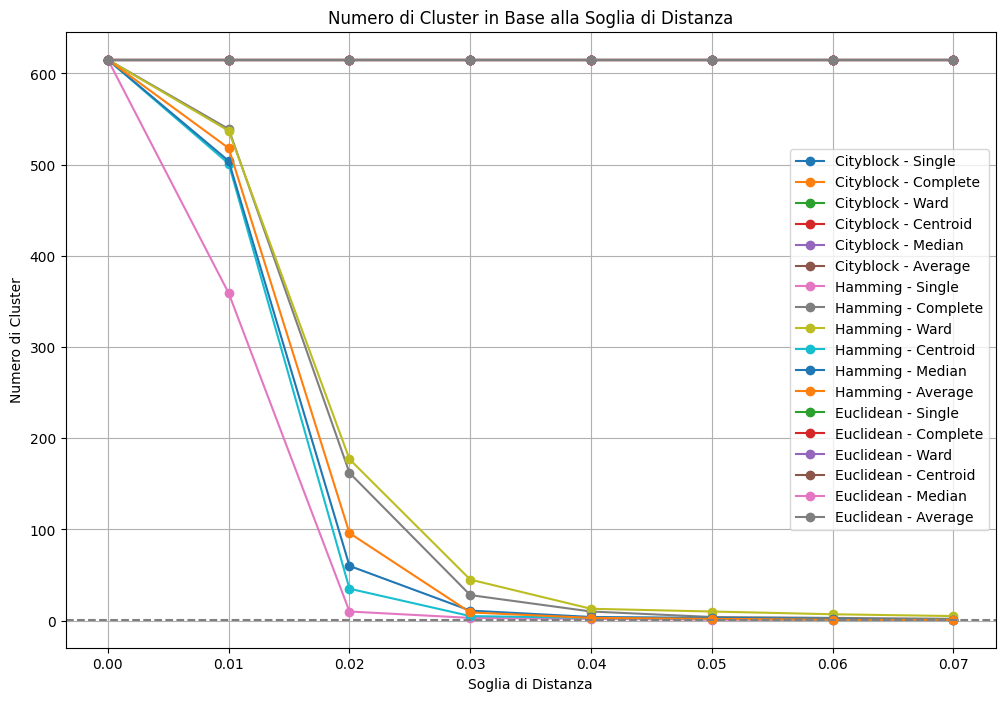

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Funzione per calcolare i cluster e memorizzare il numero di cluster
def calculate_clusters(data, metric, thresholds, method):
    num_clusters = []
    for threshold in thresholds:
        distance_matrix = pdist(data, metric=metric)
        linked = linkage(distance_matrix, method=method)
        clusters = fcluster(linked, t=threshold, criterion='distance')
        num_clusters.append(len(set(clusters)))
    return num_clusters

# Imposta i dati
vectors, card_names = grim.vectorize()
data = np.array(list(vectors.values()))

# Liste per memorizzare il numero di cluster per ciascuna metrica e metodo
num_clusters_results = {
    'cityblock': {},
    'hamming': {},
    'euclidean': {}
}

# Definire un range di soglie
thresholds = [0, 0.01, 0.02, 0.03, 0.05, 0.08, 0.5, 5, 10, 30,50, 80, 100]np.arange(0, 0.08, 0.01)

# Definisci i metodi di linkage da testare
linkage_methods = ['single', 'complete', 'ward', 'centroid', 'median', 'average']

# Calcola i cluster per ogni metrica e metodo di linkage
for method in linkage_methods:
    num_clusters_results['cityblock'][method] = calculate_clusters(data, 'cityblock', thresholds, method)
    num_clusters_results['hamming'][method] = calculate_clusters(data, 'hamming', thresholds, method)
    num_clusters_results['euclidean'][method] = calculate_clusters(data, 'euclidean', thresholds, method)

# Tracciare i risultati
plt.figure(figsize=(12, 8))

# Traccia per ogni metrica
for metric, methods in num_clusters_results.items():
    for method, num_clusters in methods.items():
        print(metric, num_clusters)
        plt.plot(thresholds, num_clusters, marker='o', label=f'{metric.capitalize()} - {method.capitalize()}')

plt.title('Numero di Cluster in Base alla Soglia di Distanza')
plt.xlabel('Soglia di Distanza')
plt.ylabel('Numero di Cluster')
plt.axhline(y=1, color='gray', linestyle='--')  # linea per il numero minimo di cluster
plt.legend()
plt.grid()
plt.show()



Numero di cluster con K-means: 5


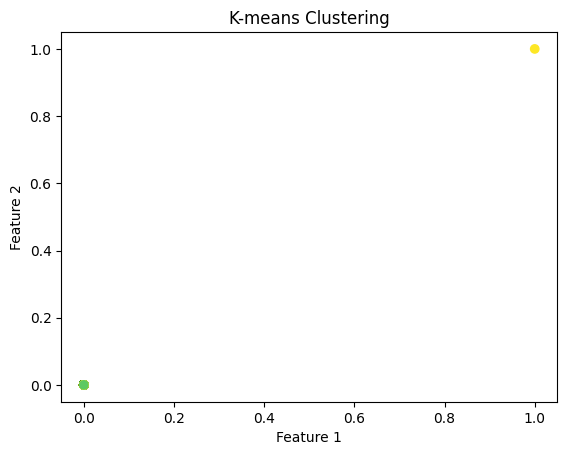

In [19]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Genera i dati
vectors, card_names = grim.vectorize()
data = np.array(list(vectors.values()))

# Scegli il numero di cluster
num_clusters = 5  # Modifica questo numero secondo necessità

# Esegui K-means
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(data)

# Stampa il numero di cluster
print(f"Numero di cluster con K-means: {len(set(clusters))}")

# (Opzionale) Traccia i risultati
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [17]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

vectors, card_names = grim.vectorize()

data = np.array(list(vectors.values()))
distance_matrix = pdist(data, metric='cityblock')
linked = linkage(distance_matrix, method='average')
distance_threshold = 0.01

clusters = fcluster(linked, t=distance_threshold, criterion='distance')

print(f"Numero di cluster: {len(set(clusters))}")


Numero di cluster: 615


In [6]:
from src.card import Card

partial = [
    Card(commander),
    Card("Sword of Feast and Famine"),
    Card("Roaring Earth"),
    Card("Inspiring Call"),
    Card("Shadowspear"),
    Card("Bone Sabres"),
    Card("Basilisk Collar")
    ]
partial_array = np.array(grim.partial_vector(partial))

In [7]:
import numpy as np
from scipy.spatial.distance import hamming 
from collections import Counter

# Imposta il numero di mazzi e cluster più vicini da considerare
num_nearest_decks = 10  # Numero di mazzi più vicini da considerare per il completamento
num_nearest_clusters = 10  # Numero di cluster più vicini da considerare

# Lista 'partial' che rappresenta il mazzo parziale
partial_array = np.array(partial_array)


# Trova i cluster più vicini
closest_clusters = []
for i, cluster_id in enumerate(set(clusters)):
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_data = data[cluster_indices]
    avg_distance = np.mean([hamming(partial_array, deck) for deck in cluster_data]) 
    closest_clusters.append((cluster_id, avg_distance))

# Ordina i cluster per distanza e seleziona i `num_nearest_clusters` cluster più vicini
closest_clusters = sorted(closest_clusters, key=lambda x: x[1])[:num_nearest_clusters]

# Combina tutti i mazzi dai cluster più vicini
closest_decks = []
for cluster_id, _ in closest_clusters:
    cluster_indices = np.where(clusters == cluster_id)[0]
    cluster_decks = data[cluster_indices]
    
    # Calcola la distanza di Hamming e seleziona i mazzi più vicini
    deck_distances = [(deck, hamming(partial_array, deck)) for deck in cluster_decks]  
    sorted_decks = sorted(deck_distances, key=lambda x: x[1])[:num_nearest_decks]
    closest_decks.extend([deck for deck, _ in sorted_decks])

# Trova le carte più frequenti nei mazzi vicini
missing_card_indices = np.where(partial_array == 0)[0]
card_counts = Counter()

for deck in closest_decks:
    card_counts.update(np.where(deck == 1)[0])

# Rimuovi le carte già presenti in 'partial_array'
for index in np.where(partial_array == 1)[0]:
    card_counts.pop(index, None)

# Ottieni una lista delle carte più probabili per completare 'partial_array'
most_probable_cards = [idx for idx, _ in card_counts.most_common()]

print("Carte più probabili per completare il mazzo:")
advised_cards = []
for card_i in most_probable_cards:
    card = card_names[card_i]
    if card not in partial and card.filter(negative_filters=[Filters.isBasic]):
        advised_cards.append(card)

for card in advised_cards:
    print(card)


Carte più probabili per completare il mazzo:
Tiamat
Changeling Outcast
Morophon, the Boundless
Miirym, Sentinel Wyrm
Universal Automaton
Masked Vandal
Unsettled Mariner
Mirror Entity
Risen Reef
Amoeboid Changeling
Maskwood Nexus
Taurean Mauler
Rith, Liberated Primeval
Ancient Brass Dragon
Ancient Gold Dragon
Leyline of the Guildpact
Arcane Signet
Chromatic Lantern
Scion of the Ur-Dragon
Teneb, the Harvester
Dromoka, the Eternal
Korlessa, Scale Singer
Bladewing the Risen
Rivaz of the Claw
Atarka, World Render
Dragonspeaker Shaman
Birds of Paradise
Ignoble Hierarch
Noble Hierarch
Old Gnawbone
Dragonlord Dromoka
Ancient Silver Dragon
Two-Headed Hellkite
Terror of the Peaks
Goldspan Dragon
Steel Hellkite
Leyline of Mutation
Sol Ring
Dragon Broodmother
Earthquake Dragon
Scion of Draco
Utvara Hellkite
Obsidian Charmaw
Ugin, the Spirit Dragon
Progenitus
Ramos, Dragon Engine
Dragonlord Dromoka
Balefire Dragon
Skithiryx, the Blight Dragon
Akul the Unrepentant
Nicol Bolas, the Ravager // Nicol B